In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip install geopy

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiSample")

In [0]:
domestic_india = pd.read_csv("domestic_india_states.csv")

In [0]:
import time
def geolocation(domestic_india):
  df = domestic_india.copy()
  df['city'] = ""
  df['state'] = ""
  df['country'] = ""
  e=0
  for count,i in enumerate(domestic_india.iloc[14001:]['user_location']):
    city_list = []
    state_list = []
    country_list = []
    e = count+14001
    print(e,count)
    loc_cord = geolocator.geocode(i,timeout=10)
    if pd.isnull(loc_cord):
      city_list.append('unknown')
      state_list.append('unknown')
      country_list.append('unknown')
    else:  
      location = geolocator.reverse(loc_cord[1], exactly_one=True)
      try:
        address = location.raw['address']
        city = address.get('city', '')
        state = address.get('state', '')
        country = address.get('country', '')
        city_list.append(city)
        state_list.append(state)
        country_list.append(country)
      except:
        city_list.append('unknown')
        state_list.append('unknown')
        country_list.append('unknown')
    df.at[e,'city'] = city_list[0]
    df.at[e,'state'] = state_list[0]
    df.at[e,'country'] = country_list[0]
    if e%500==0:
        print(f'got {e} cities')
        df1 = df.iloc[(e+1-500):e+1]
        df1.to_csv(f"samplegeo/domestic_india{e}.csv",index=False)
        time.sleep(60)
  return "Success"


In [0]:
geolocation(domestic_india)

## For tamil words

In [0]:
domestic_tamil = pd.read_csv("domestic_tamil_words.csv")

In [0]:
import time
def geolocation_tamil(domestic_tamil):
  df = domestic_tamil.copy()
  df['city'] = ""
  df['state'] = ""
  df['country'] = ""
  e=0
  for e,i in enumerate(domestic_tamil['user_location']):
    city_list = []
    state_list = []
    country_list = []
    print(e)
    loc_cord = geolocator.geocode(i,timeout=10)
    if pd.isnull(loc_cord):
      city_list.append('unknown')
      state_list.append('unknown')
      country_list.append('unknown')
    else:  
      location = geolocator.reverse(loc_cord[1], exactly_one=True)
      try:
        address = location.raw['address']
        city = address.get('city', '')
        state = address.get('state', '')
        country = address.get('country', '')
        city_list.append(city)
        state_list.append(state)
        country_list.append(country)
      except:
        city_list.append('unknown')
        state_list.append('unknown')
        country_list.append('unknown')
    df.at[e,'city'] = city_list[0]
    df.at[e,'state'] = state_list[0]
    df.at[e,'country'] = country_list[0]
    if (e%500==0) and (e!=0):
        print(f'got {e} cities')
        df1 = df.iloc[(e+1-500):e+1]
        df1.to_csv(f"samplegeo_tamil/domestic_tamil{e}.csv",index=False)
        time.sleep(60)
  return "Success"


In [0]:
geolocation_tamil(domestic_tamil)

## After running the above code for some hours, I have just uploaded the data stored in this workspace to continue with processing

In [0]:
import glob

In [0]:
tamil_df = pd.DataFrame()
for filename in glob.glob("samplegeo_tamil/*"):
  tamil_df = tamil_df.append(pd.read_csv(filename))

In [0]:
tamil_df.shape

(2500, 15)

In [0]:
tamil_df.head(2)

,username,text,retweets,favorites,replies,tweet_id,user_id,date,hashtags,mentions,tweet_location,user_location,city,state,country
0,amarjit_kharga,"@Google Hi , I am not able to recover my gmail...",0,0,0,1263183223913189376,3514638193,2020-05-20 19:02:04+00:00,NaN,@Google,NaN,"Bengaluru, India",Bengaluru,Karnataka,India
1,Amarjith7A,എന്നാ ഒരു ഇതാ #HappyBirthdayMohanlal,1,0,0,1263132239765753857,2857754209,2020-05-20 15:39:28+00:00,#HappyBirthdayMohanlal,NaN,NaN,"Kerala, India",NaN,Kerala,India


In [0]:
tamil_df = tamil_df.loc[tamil_df['country'] == "India",:]

In [0]:
tamil_df.to_csv("tamil_words_twitter.csv",index=False)

In [0]:
india_df = pd.DataFrame()
for filename in glob.glob("domestic_india/*"):
  india_df = india_df.append(pd.read_csv(filename))

In [0]:
india_df['country'].value_counts()

India                          6089
پاکستان                        1687
Philippines                    1680
Indonesia                      1258
Malaysia                       1130
                               ... 
Laos                              1
Uganda                            1
Timor-Leste; Timor Lorosa'e       1
Burundi                           1
Suriname                          1
Name: country, Length: 130, dtype: int64

In [0]:
india_df = india_df.loc[india_df['country'] == "India",:]

In [0]:
india_df.to_csv("India_English_Words.csv",index=False)

In [0]:
india_english = pd.read_csv("India_English_Words.csv")

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
india_english['city'].value_counts()

New Delhi      719
Mumbai         644
Bengaluru      313
Hyderabad      199
Delhi          175
              ... 
Tirunelveli      1
Kolhapur         1
Palanpur         1
Bhuj             1
Sachin           1
Name: city, Length: 153, dtype: int64

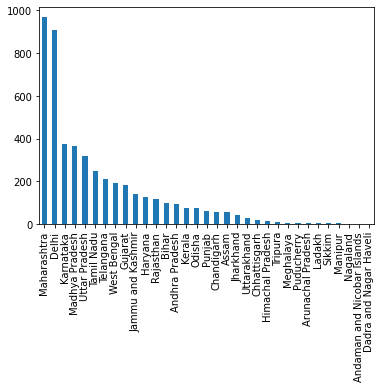

In [0]:
india_english.loc[(india_english['user_location'] != "India"),:]['state'].value_counts().plot(kind="bar")

In [0]:
india_english.shape

(6089, 15)

In [0]:
india_english = pd.read_csv("India_English_Words.csv")

In [0]:
# (husband OR wife OR daughter OR father OR relative OR mother OR sister OR uncle OR grandfather OR \
#                             neighbour OR parent OR child OR cousin OR inlaw OR in-law OR boyfriend OR marital OR domestic OR \
#                             partner OR family OR maid OR housemaid OR gay OR ex OR liquor) \
#                             \
#                             AND (abuse OR violence OR sexual OR harass OR harasssing OR assault OR torture OR rape OR slap OR \
#                             force OR molest OR physical OR burn OR beat OR sabotage OR threaten OR pressurize OR dowry) \
#                             \
#                             AND (sos OR help OR helpline OR hotline OR police OR save)

In [0]:
word1 = ['husband','wife','daughter','father','relative',\
         'mother','sister','uncle','granfather','neighbour',\
         'neighbor','parent','child','cousin','inlaw','in-law',\
         'bf','boyfriend','marital','domestic','partner','family',\
         'maid','housemaid','gay','ex','liquor']
word2 = ['abuse','violence','sexual','harass',\
         'harassing','assault','torture','rape',\
         'slap','force','molest','physical','burn',\
         'beat','sabotage','threaten','pressurize','pressurise',\
         'dowry','sos','help','helpline','save','police']
def checking_tweets(x):
  print(x)
  cond1 = any(word in x for word in word1)
  cond2 = any(word in x for word in word2)
  if cond1 and cond2:
    return 1
  else:
    return 0 


In [31]:
import unicodedata  
from nltk import sent_tokenize
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', str(word))
        new_word = re.sub(r'(.)\1+', r'\1\1', str(new_word)) 
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stop_words = []
    stop_words.append(stopwords.words('english'))
    for word in words:
        if(word not in stop_words):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [0]:
def preprocess(text):
    # text = replace_contractions(text)
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(words)
    words = lemmatize_verbs(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    # text= ' '.join(list(dict.fromkeys(words)))
    text = ' '.join(words)
    return text

In [0]:
india_english['text'] = india_english['text'].fillna('').apply(str)

In [0]:
india_english['text'] = india_english['text'].apply(preprocess)

In [51]:
india_english['success'] = india_english['text'].apply(checking_tweets)

Streaming output truncated to the last 5000 lines.
a religion where waste water be a sin how precious would blood be allah sys you wuld never enter in paradise if another man be hurt by your wordsactions and he do not forgive you for it what punishment would kill someone from inside will have thats y knowislam
this game will always be a shitfirst of all fix all bug and glitches so many bug in this gameand lag so much but developers be nothing work on bug and lag they be work on new mode and add new skin first of all you fix all the bug motherfucker
ye log hindu dharm ki aar may sex racket chalane wali call girl hai aur kuch nhi
pray for well be and safety of people during amphancyclone stay safe and alert
such vulgar language by take the name of these be unacceptable these be legal offenses and the only punishment be jail fir and jail necessary against pankaj punia a terrible crime that be write about daughters __
dinosaurs save themselves by become extinct if not you guy would eat din

In [52]:
india_english['success'].value_counts()

0    5642
1     447
Name: success, dtype: int64

In [0]:
india_english = india_english.loc[india_english['success'] == 1,:]
india_english.drop(columns="success",inplace=True,axis=1)

In [0]:
india_english.to_csv("India_English_Words_Filtered.csv")